In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:


#Load v√† kh√°m ph√° d·ªØ li·ªáu c∆° b·∫£n
def load_and_explore_data():
    """Load v√† kh√°m ph√° d·ªØ li·ªáu t·ª´ c√°c file ƒë√£ crawl"""

    print("=" * 60)
    print("KH√ÅM PH√Å D·ªÆ LI·ªÜU LINKS THU·ªêC")
    print("=" * 60)

    links_file = r"D:\OU\DoAn\DrugRecommandation\crawlData_LongChau\danh_muc_links\longchau_medicines_links.csv"
    df_links = None
    if os.path.exists(links_file):
        df_links = pd.read_csv(links_file, encoding='utf-8-sig')
        print(f"T·ªïng s·ªë b·∫£n ghi links: {len(df_links)}")
        print(f"S·ªë c·ªôt: {df_links.shape[1]}")
        print(f"C√°c c·ªôt: {list(df_links.columns)}")
        print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu: {df_links.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

        # Th·ªëng k√™ theo k√Ω t·ª±
        if 'K√Ω t·ª±' in df_links.columns:
            char_stats = df_links['K√Ω t·ª±'].value_counts()
            print("\nTh·ªëng k√™ theo k√Ω t·ª±:")
            for char, count in char_stats.head(10).items():
                print(f" {char}: {count} thu·ªëc")
    else:
        print("Ch∆∞a c√≥ file links")


    print("\n" + "=" * 60)
    print("KH√ÅM PH√Å D·ªÆ LI·ªÜU CHI TI·∫æT THU·ªêC")
    print("=" * 60)

    detail_file = r"D:\OU\DoAn\DrugRecommandation\crawlData_LongChau\LongChau_rawData.csv"
    df_details = None
    if os.path.exists(detail_file):
        df_details = pd.read_csv(detail_file, encoding='utf-8')
        print(f"T·ªïng s·ªë thu·ªëc chi ti·∫øt: {len(df_details)}")
        print(f"S·ªë c·ªôt: {df_details.shape[1]}")
        print(f"C√°c c·ªôt: {list(df_details.columns)}")

        # Ki·ªÉm tra missing values
        missing_stats = df_details.isnull().sum()
        missing_percent = (missing_stats / len(df_details)) * 100
        print("\nTh·ªëng k√™ d·ªØ li·ªáu thi·∫øu:")
        for col in df_details.columns:
            if missing_stats[col] > 0:
                print(f" {col}: {missing_stats[col]} ({missing_percent[col]:.1f}%)")
    else:
        print("Ch∆∞a c√≥ file d·ªØ li·ªáu chi ti·∫øt")

    return df_links, df_details


# Ch·∫°y kh√°m ph√° d·ªØ li·ªáu
df_links, df_details = load_and_explore_data()


KH√ÅM PH√Å D·ªÆ LI·ªÜU LINKS THU·ªêC
T·ªïng s·ªë b·∫£n ghi links: 5672
S·ªë c·ªôt: 4
C√°c c·ªôt: ['T√™n thu·ªëc', 'Link', 'K√Ω t·ª±', 'Trang']
K√≠ch th∆∞·ªõc d·ªØ li·ªáu: 2.22 MB

Th·ªëng k√™ theo k√Ω t·ª±:
 A: 595 thu·ªëc
 C: 521 thu·ªëc
 S: 443 thu·ªëc
 M: 401 thu·ªëc
 T: 370 thu·ªëc
 P: 354 thu·ªëc
 D: 341 thu·ªëc
 B: 301 thu·ªëc
 L: 260 thu·ªëc
 N: 248 thu·ªëc

KH√ÅM PH√Å D·ªÆ LI·ªÜU CHI TI·∫æT THU·ªêC
T·ªïng s·ªë thu·ªëc chi ti·∫øt: 5672
S·ªë c·ªôt: 12
C√°c c·ªôt: ['url', 'ten_thuoc', 'gia', 'hinh_anh', 'thanh_phan', 'cong_dung', 'chong_chi_dinh', 'lieu_dung', 'luu_y', 'tac_dung_phu', 'bao_quan', 'mo_ta']

Th·ªëng k√™ d·ªØ li·ªáu thi·∫øu:


PH√ÇN T√çCH D·ªÆ LI·ªÜU LINKS CHI TI·∫æT
T·ªïng s·ªë thu·ªëc: 5,672
S·ªë link duy nh·∫•t: 5,672
T·ª∑ l·ªá tr√πng l·∫∑p: 0.00%


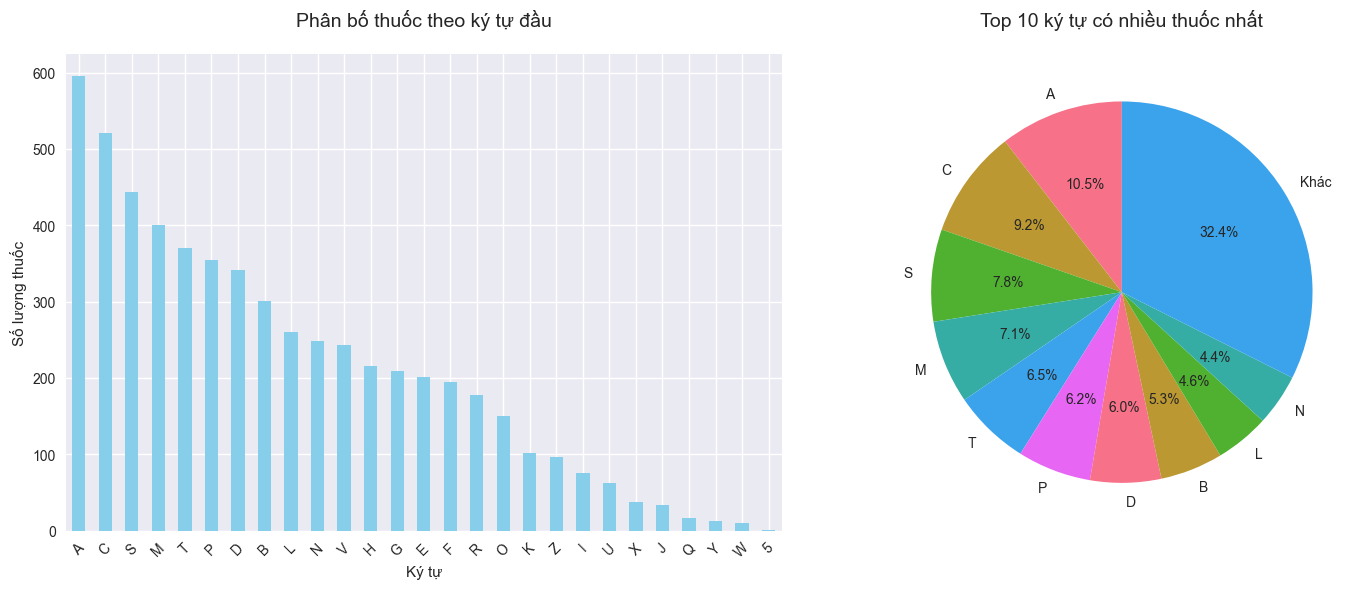


Top 10 k√Ω t·ª± c√≥ nhi·ªÅu thu·ªëc:
    1. A: 595 thu·ªëc
    2. C: 521 thu·ªëc
    3. S: 443 thu·ªëc
    4. M: 401 thu·ªëc
    5. T: 370 thu·ªëc
    6. P: 354 thu·ªëc
    7. D: 341 thu·ªëc
    8. B: 301 thu·ªëc
    9. L: 260 thu·ªëc
   10. N: 248 thu·ªëc

Ph√¢n t√≠ch t√™n thu·ªëc:
ƒê·ªô d√†i t√™n trung b√¨nh: 82.7 k√Ω t·ª±
T√™n ng·∫Øn nh·∫•t: 33 k√Ω t·ª±
T√™n d√†i nh·∫•t: 133 k√Ω t·ª±

Top 15 t·ª´ kh√≥a ph·ªï bi·∫øn trong t√™n thu·ªëc:
   ‚Ä¢ tr·ªã: 4,570 l·∫ßn
   ‚Ä¢ ƒëi·ªÅu: 4,519 l·∫ßn
   ‚Ä¢ vi√™n: 4,501 l·∫ßn
   ‚Ä¢ thu·ªëc: 3,899 l·∫ßn
   ‚Ä¢ vi√™m: 1,434 l·∫ßn
   ‚Ä¢ ƒëau: 722 l·∫ßn
   ‚Ä¢ nhi·ªÖm: 715 l·∫ßn
   ‚Ä¢ b·ªánh: 699 l·∫ßn
   ‚Ä¢ huy·∫øt: 644 l·∫ßn


In [ ]:
# Cell 3: Ph√¢n t√≠ch d·ªØ li·ªáu links
def analyze_links_data(df_links):
    """Ph√¢n t√≠ch chi ti·∫øt d·ªØ li·ªáu links"""
    if df_links is None:
        print("Kh√¥ng c√≥ d·ªØ li·ªáu links ƒë·ªÉ ph√¢n t√≠ch")
        return
     
    # 1. Th·ªëng k√™ c∆° b·∫£n
    print(f"T·ªïng s·ªë thu·ªëc: {len(df_links):,}")
    print(f"S·ªë link duy nh·∫•t: {df_links['Link'].nunique():,}")
    print(f"T·ª∑ l·ªá tr√πng l·∫∑p: {((len(df_links) - df_links['Link'].nunique()) / len(df_links) * 100):.2f}%")
    
    # 2. Ph√¢n b·ªë theo k√Ω t·ª±
    if 'K√Ω t·ª±' in df_links.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Bi·ªÉu ƒë·ªì c·ªôt
        char_counts = df_links['K√Ω t·ª±'].value_counts()
        char_counts.plot(kind='bar', ax=ax1, color='skyblue')
        ax1.set_title('Ph√¢n b·ªë thu·ªëc theo k√Ω t·ª± ƒë·∫ßu', fontsize=14, pad=20)
        ax1.set_xlabel('K√Ω t·ª±')
        ax1.set_ylabel('S·ªë l∆∞·ª£ng thu·ªëc')
        ax1.tick_params(axis='x', rotation=45)
        
        # Bi·ªÉu ƒë·ªì pie cho top 10
        top_chars = char_counts.head(10)
        other_sum = char_counts.iloc[10:].sum()
        if other_sum > 0:
            top_chars['Kh√°c'] = other_sum
        
        ax2.pie(top_chars.values, labels=top_chars.index, autopct='%1.1f%%', startangle=90)
        ax2.set_title('Top 10 k√Ω t·ª± c√≥ nhi·ªÅu thu·ªëc nh·∫•t', fontsize=14, pad=20)
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nTop 10 k√Ω t·ª± c√≥ nhi·ªÅu thu·ªëc:")
        for i, (char, count) in enumerate(char_counts.head(10).items(), 1):
            print(f"   {i:2d}. {char}: {count:,} thu·ªëc")
    
    # 3. Ph√¢n t√≠ch t√™n thu·ªëc
    if 'T√™n thu·ªëc' in df_links.columns:
        print(f"\nPh√¢n t√≠ch t√™n thu·ªëc:")
        
        # ƒê·ªô d√†i t√™n thu·ªëc
        name_lengths = df_links['T√™n thu·ªëc'].str.len()
        print(f"ƒê·ªô d√†i t√™n trung b√¨nh: {name_lengths.mean():.1f} k√Ω t·ª±")
        print(f"T√™n ng·∫Øn nh·∫•t: {name_lengths.min()} k√Ω t·ª±")
        print(f"T√™n d√†i nh·∫•t: {name_lengths.max()} k√Ω t·ª±")
        
        # T·ª´ kh√≥a ph·ªï bi·∫øn trong t√™n thu·ªëc
        all_names = ' '.join(df_links['T√™n thu·ªëc'].astype(str))
        words = re.findall(r'\b\w+\b', all_names.lower())
        word_freq = Counter(words)
        
        print(f"\nTop 15 t·ª´ kh√≥a ph·ªï bi·∫øn trong t√™n thu·ªëc:")
        for word, freq in word_freq.most_common(15):
            if len(word) > 2:  # B·ªè qua t·ª´ qu√° ng·∫Øn
                print(f"   ‚Ä¢ {word}: {freq:,} l·∫ßn")

# Ch·∫°y ph√¢n t√≠ch links
analyze_links_data(df_links)

PH√ÇN T√çCH D·ªÆ LI·ªÜU CHI TI·∫æT THU·ªêC
ƒê·ªô ƒë·∫ßy ƒë·ªß d·ªØ li·ªáu theo tr∆∞·ªùng:
ten_thuoc           : 5672/5672 (100.0%)
gia                 : 5672/5672 (100.0%)
hinh_anh            : 5672/5672 (100.0%)
thanh_phan          : 5672/5672 (100.0%)
cong_dung           : 5672/5672 (100.0%)
chong_chi_dinh      : 5672/5672 (100.0%)
lieu_dung           : 5672/5672 (100.0%)
luu_y               : 5672/5672 (100.0%)
tac_dung_phu        : 5672/5672 (100.0%)
bao_quan            : 5672/5672 (100.0%)
mo_ta               : 5672/5672 (100.0%)


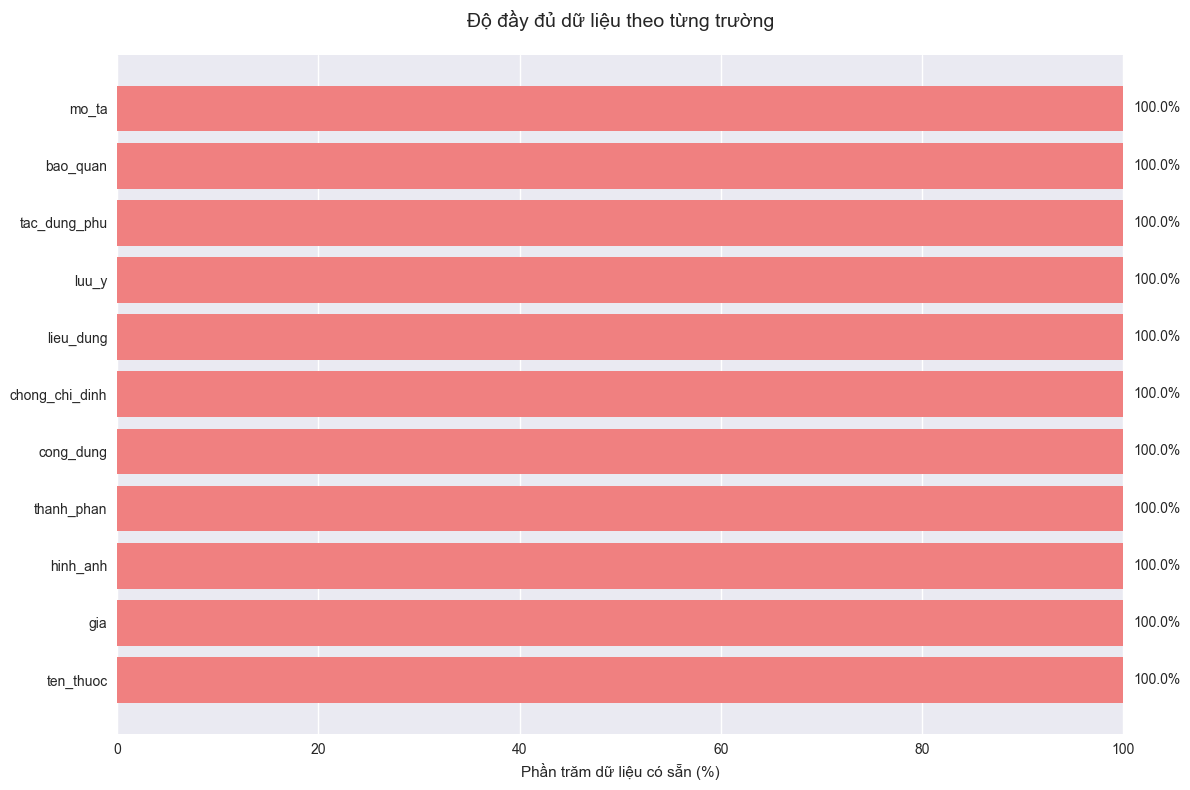


Ph√¢n t√≠ch gi√° thu·ªëc:
S·ªë thu·ªëc c√≥ gi√°: 1198
Gi√° trung b√¨nh: 114 VNƒê
Gi√° trung v·ªã: 31 VNƒê
Gi√° th·∫•p nh·∫•t: 1 VNƒê
Gi√° cao nh·∫•t: 980 VNƒê


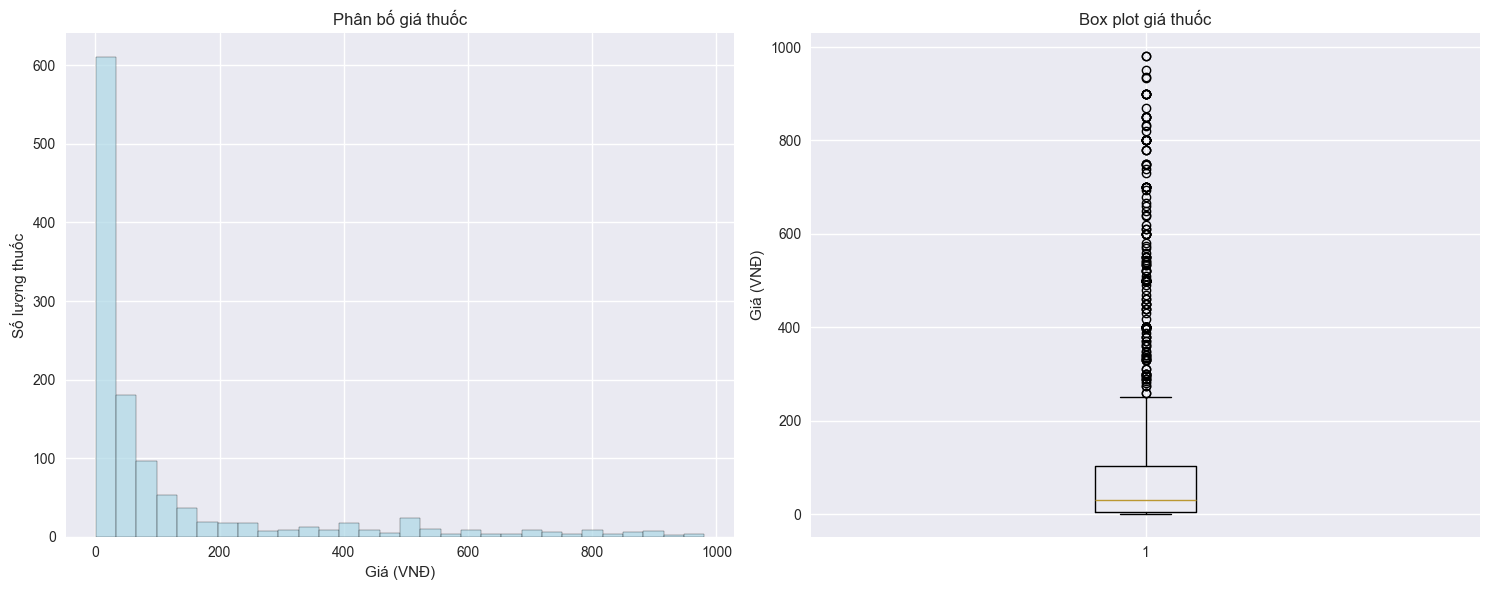

In [5]:
#Ph√¢n t√≠ch d·ªØ li·ªáu chi ti·∫øt thu·ªëc
def analyze_medicine_details(df_details):
    """Ph√¢n t√≠ch chi ti·∫øt d·ªØ li·ªáu thu·ªëc"""
    if df_details is None:
        print(" Kh√¥ng c√≥ d·ªØ li·ªáu chi ti·∫øt ƒë·ªÉ ph√¢n t√≠ch")
        return
    
    print("=" * 60)
    print("PH√ÇN T√çCH D·ªÆ LI·ªÜU CHI TI·∫æT THU·ªêC")
    print("=" * 60)
    
    # 1. Th·ªëng k√™ ƒë·ªô ƒë·∫ßy ƒë·ªß d·ªØ li·ªáu
    completeness = {}
    for col in df_details.columns:
        if col not in ['url', 'URL']:
            non_null = df_details[col].notna().sum()
            completeness[col] = {
                'count': non_null,
                'percentage': (non_null / len(df_details)) * 100
            }
    
    # S·∫Øp x·∫øp theo ƒë·ªô ƒë·∫ßy ƒë·ªß
    sorted_completeness = sorted(completeness.items(), 
                               key=lambda x: x[1]['percentage'], 
                               reverse=True)
    
    print(f"ƒê·ªô ƒë·∫ßy ƒë·ªß d·ªØ li·ªáu theo tr∆∞·ªùng:")
    for field, stats in sorted_completeness:
        print(f"{field:20}: {stats['count']:4d}/{len(df_details)} ({stats['percentage']:5.1f}%)")
    
    # 2. Visualize completeness
    fig, ax = plt.subplots(figsize=(12, 8))
    fields = [item[0] for item in sorted_completeness]
    percentages = [item[1]['percentage'] for item in sorted_completeness]
    
    bars = ax.barh(fields, percentages, color='lightcoral')
    ax.set_xlabel('Ph·∫ßn trƒÉm d·ªØ li·ªáu c√≥ s·∫µn (%)')
    ax.set_title('ƒê·ªô ƒë·∫ßy ƒë·ªß d·ªØ li·ªáu theo t·ª´ng tr∆∞·ªùng', fontsize=14, pad=20)
    ax.set_xlim(0, 100)
    
    # Th√™m labels
    for i, (bar, pct) in enumerate(zip(bars, percentages)):
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                f'{pct:.1f}%', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # 3. Ph√¢n t√≠ch gi√° thu·ªëc
    if any(col in df_details.columns for col in ['gia', 'Gi√°']):
        price_col = 'gia' if 'gia' in df_details.columns else 'Gi√°'
        print(f"\nPh√¢n t√≠ch gi√° thu·ªëc:")
        
        # L√†m s·∫°ch d·ªØ li·ªáu gi√°
        prices_raw = df_details[price_col].dropna()
        prices_clean = []
        
        for price in prices_raw:
            if isinstance(price, str):
                # Tr√≠ch xu·∫•t s·ªë t·ª´ chu·ªói gi√°
                numbers = re.findall(r'[\d,]+', price)
                if numbers:
                    try:
                        clean_price = float(numbers[0].replace(',', ''))
                        if clean_price > 0:
                            prices_clean.append(clean_price)
                    except:
                        continue
        
        if prices_clean:
            prices_series = pd.Series(prices_clean)
            print(f"S·ªë thu·ªëc c√≥ gi√°: {len(prices_clean)}")
            print(f"Gi√° trung b√¨nh: {prices_series.mean():,.0f} VNƒê")
            print(f"Gi√° trung v·ªã: {prices_series.median():,.0f} VNƒê")
            print(f"Gi√° th·∫•p nh·∫•t: {prices_series.min():,.0f} VNƒê")
            print(f"Gi√° cao nh·∫•t: {prices_series.max():,.0f} VNƒê")
            
            # Ph√¢n b·ªë gi√°
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # Histogram
            ax1.hist(prices_series, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
            ax1.set_xlabel('Gi√° (VNƒê)')
            ax1.set_ylabel('S·ªë l∆∞·ª£ng thu·ªëc')
            ax1.set_title('Ph√¢n b·ªë gi√° thu·ªëc')
            
            # Box plot
            ax2.boxplot(prices_series)
            ax2.set_ylabel('Gi√° (VNƒê)')
            ax2.set_title('Box plot gi√° thu·ªëc')
            
            plt.tight_layout()
            plt.show()

# Ch·∫°y ph√¢n t√≠ch chi ti·∫øt
analyze_medicine_details(df_details)

PH√ÇN T√çCH TH√ÄNH PH·∫¶N V√Ä C√îNG D·ª§NG
Ph√¢n t√≠ch th√†nh ph·∫ßn thu·ªëc:

Top 15 th√†nh ph·∫ßn ph·ªï bi·∫øn:
   ‚Ä¢ 500mg: 519 l·∫ßn
   ‚Ä¢ 10mg: 448 l·∫ßn
   ‚Ä¢ 100mg: 375 l·∫ßn
   ‚Ä¢ 50mg: 359 l·∫ßn
   ‚Ä¢ 20mg: 321 l·∫ßn
   ‚Ä¢ 200mg: 289 l·∫ßn
   ‚Ä¢ 40mg: 240 l·∫ßn
   ‚Ä¢ 300mg: 197 l·∫ßn
   ‚Ä¢ 250mg: 189 l·∫ßn
   ‚Ä¢ 25mg: 151 l·∫ßn
   ‚Ä¢ 400mg: 144 l·∫ßn
   ‚Ä¢ paracetamol: 135 l·∫ßn
   ‚Ä¢ 30mg: 129 l·∫ßn
   ‚Ä¢ 15mg: 123 l·∫ßn
   ‚Ä¢ 150mg: 120 l·∫ßn


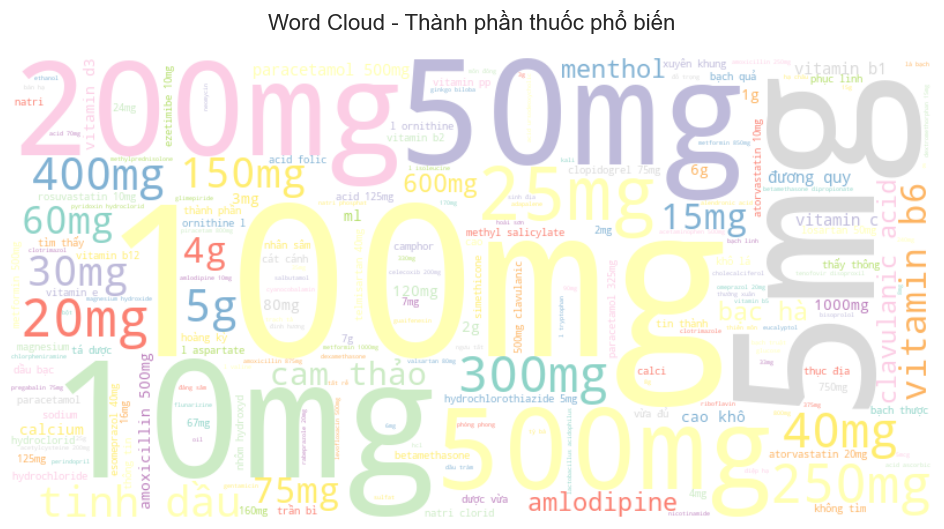


Ph√¢n t√≠ch c√¥ng d·ª•ng thu·ªëc:

Top 20 t·ª´ kh√≥a trong c√¥ng d·ª•ng:
trong: 11703 l·∫ßn
thu·ªëc: 11658 l·∫ßn
ƒë·ªãnh: 10946 l·∫ßn
tr∆∞·ªùng: 9654 l·∫ßn
ƒëi·ªÅu: 7404 l·∫ßn
vi√™m: 6777 l·∫ßn
b·ªánh: 6665 l·∫ßn
d√πng: 5929 l·∫ßn
ƒë∆∞·ª£c: 5428 l·∫ßn
ch·ªëng: 4593 l·∫ßn
nhi·ªÖm: 3519 l·∫ßn
ho·∫∑c: 3289 l·∫ßn
ch·ª©ng: 3244 l·∫ßn
khu·∫©n: 3004 l·∫ßn
nh√¢n: 2808 l·∫ßn
ƒë∆∞·ªùng: 2365 l·∫ßn
huy·∫øt: 2310 l·∫ßn
t√≠nh: 2288 l·∫ßn
ng∆∞·ªùi: 2231 l·∫ßn
gi·∫£m: 2114 l·∫ßn


In [6]:
# Ph√¢n t√≠ch th√†nh ph·∫ßn v√† c√¥ng d·ª•ng thu·ªëc
def analyze_medicine_content(df_details):
    """Ph√¢n t√≠ch n·ªôi dung th√†nh ph·∫ßn v√† c√¥ng d·ª•ng"""
    if df_details is None:
        return
    
    print("=" * 60)
    print("PH√ÇN T√çCH TH√ÄNH PH·∫¶N V√Ä C√îNG D·ª§NG")
    print("=" * 60)
    
    # 1. Ph√¢n t√≠ch th√†nh ph·∫ßn
    ingredient_cols = [col for col in df_details.columns 
                      if any(keyword in col.lower() for keyword in ['thanh_phan', 'th√†nh ph·∫ßn', 'ingredients'])]
    
    if ingredient_cols:
        print("Ph√¢n t√≠ch th√†nh ph·∫ßn thu·ªëc:")
        ingredient_col = ingredient_cols[0]
        
        # L·∫•y t·∫•t c·∫£ th√†nh ph·∫ßn
        all_ingredients = []
        ingredients_data = df_details[ingredient_col].dropna()
        
        for ingredients in ingredients_data:
            if isinstance(ingredients, str):
                # T√°ch c√°c th√†nh ph·∫ßn
                parts = re.split(r'[,;:\n]', ingredients.lower())
                for part in parts:
                    clean_part = re.sub(r'[^\w\s]', ' ', part).strip()
                    if len(clean_part) > 3:
                        all_ingredients.append(clean_part)
        
        if all_ingredients:
            ingredient_freq = Counter(all_ingredients)
            print(f"\nTop 15 th√†nh ph·∫ßn ph·ªï bi·∫øn:")
            for ingredient, freq in ingredient_freq.most_common(15):
                print(f"   ‚Ä¢ {ingredient}: {freq} l·∫ßn")
            
            # Word cloud cho th√†nh ph·∫ßn
            if len(all_ingredients) > 10:
                try:
                    wordcloud = WordCloud(width=800, height=400, 
                                        background_color='white',
                                        colormap='Set3').generate(' '.join(all_ingredients))
                    
                    plt.figure(figsize=(12, 6))
                    plt.imshow(wordcloud, interpolation='bilinear')
                    plt.axis('off')
                    plt.title('Word Cloud - Th√†nh ph·∫ßn thu·ªëc ph·ªï bi·∫øn', fontsize=16, pad=20)
                    plt.show()
                except:
                    print("Kh√¥ng th·ªÉ t·∫°o word cloud cho th√†nh ph·∫ßn")
    
    # 2. Ph√¢n t√≠ch c√¥ng d·ª•ng
    indication_cols = [col for col in df_details.columns 
                      if any(keyword in col.lower() for keyword in ['cong_dung', 'c√¥ng d·ª•ng', 'indication', 'chi_dinh', 'ch·ªâ ƒë·ªãnh'])]
    
    if indication_cols:
        print(f"\nPh√¢n t√≠ch c√¥ng d·ª•ng thu·ªëc:")
        indication_col = indication_cols[0]
        
        # L·∫•y t·∫•t c·∫£ c√¥ng d·ª•ng
        all_indications = []
        indications_data = df_details[indication_col].dropna()
        
        for indication in indications_data:
            if isinstance(indication, str):
                # L√†m s·∫°ch text
                clean_text = re.sub(r'[^\w\s]', ' ', indication.lower())
                words = clean_text.split()
                # L·ªçc t·ª´ c√≥ √Ω nghƒ©a
                meaningful_words = [word for word in words 
                                  if len(word) > 3 and word not in ['kh√¥ng', 't√¨m', 'th·∫•y', 'th√¥ng', 'tin']]
                all_indications.extend(meaningful_words)
        
        if all_indications:
            indication_freq = Counter(all_indications)
            print(f"\nTop 20 t·ª´ kh√≥a trong c√¥ng d·ª•ng:")
            for word, freq in indication_freq.most_common(20):
                print(f"{word}: {freq} l·∫ßn")

# Ch·∫°y ph√¢n t√≠ch th√†nh ph·∫ßn
analyze_medicine_content(df_details)

PH√ÇN T√çCH CH·∫§T L∆Ø·ª¢NG D·ªÆ LI·ªÜU
Th·ªëng k√™ ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu:
Tr∆∞·ªùng               Null%    V√¥ nghƒ©a%    Ch·∫•t l∆∞·ª£ng% 
------------------------------------------------------------
ten_thuoc            0.0    % 0.0        % 100.0      %
hinh_anh             0.0    % 0.0        % 100.0      %
thanh_phan           0.0    % 0.6        % 99.4       %
mo_ta                0.0    % 2.5        % 97.5       %
lieu_dung            0.0    % 5.7        % 94.3       %
cong_dung            0.0    % 6.3        % 93.7       %
chong_chi_dinh       0.0    % 8.9        % 91.1       %
bao_quan             0.0    % 10.4       % 89.6       %
tac_dung_phu         0.0    % 24.0       % 76.0       %
luu_y                0.0    % 81.5       % 18.5       %
gia                  0.0    % 100.0      % 0.0        %


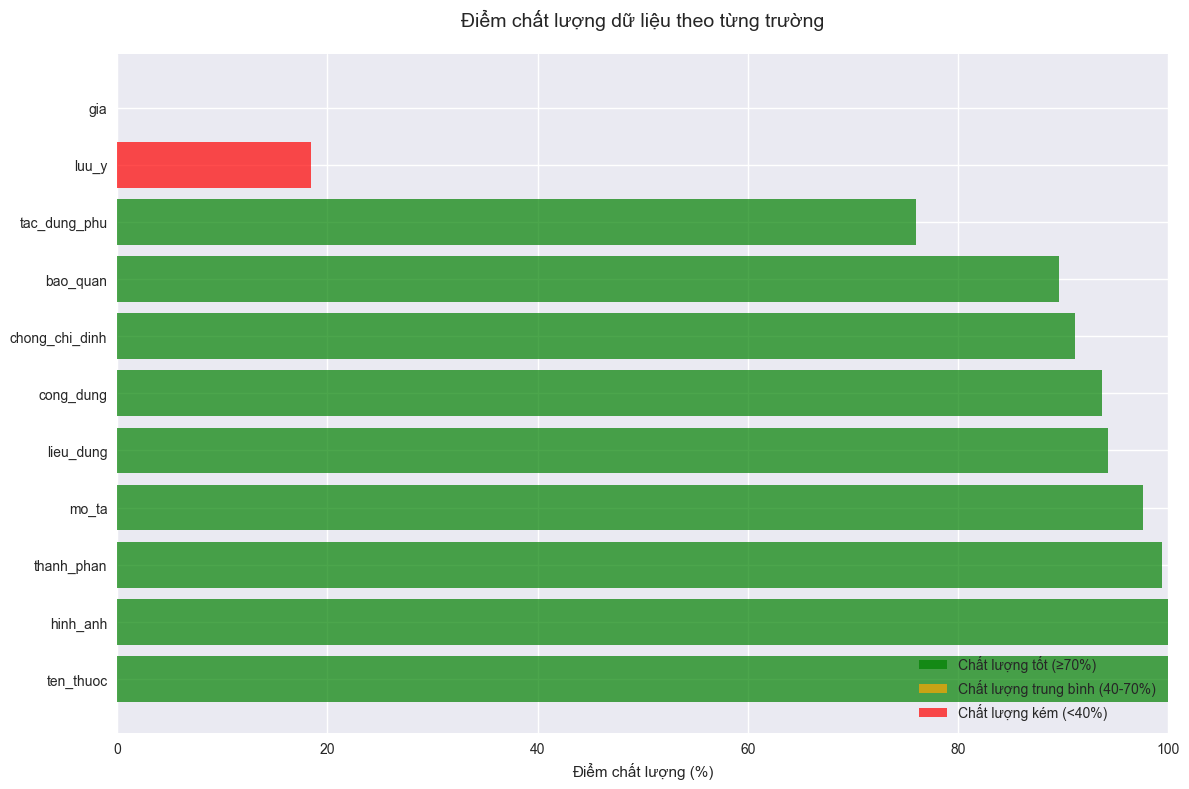


ƒê√°nh gi√° t·ªïng qu√°t:
 ƒêi·ªÉm ch·∫•t l∆∞·ª£ng trung b√¨nh: 78.2%
 Ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu t·ªët


In [7]:
# Ph√¢n t√≠ch ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu
def analyze_data_quality(df_details):
    """Ph√¢n t√≠ch ch·∫•t l∆∞·ª£ng v√† ƒë·ªô tin c·∫≠y c·ªßa d·ªØ li·ªáu"""
    if df_details is None:
        return
    
    print("=" * 60)
    print("PH√ÇN T√çCH CH·∫§T L∆Ø·ª¢NG D·ªÆ LI·ªÜU")
    print("=" * 60)
    
    # 1. Ki·ªÉm tra d·ªØ li·ªáu tr·ªëng ho·∫∑c kh√¥ng c√≥ √Ω nghƒ©a
    meaningless_patterns = [
        'kh√¥ng t√¨m th·∫•y',
        'kh√¥ng c√≥',
        'n/a',
        'ch∆∞a c√≥',
        'ƒëang c·∫≠p nh·∫≠t'
    ]
    
    quality_stats = {}
    
    for col in df_details.columns:
        if col not in ['url', 'URL']:
            total_records = len(df_details)
            non_null = df_details[col].notna().sum()
            
            # ƒê·∫øm c√°c gi√° tr·ªã c√≥ √Ω nghƒ©a
            meaningful_count = 0
            for value in df_details[col].dropna():
                if isinstance(value, str):
                    is_meaningful = True
                    value_lower = value.lower()
                    for pattern in meaningless_patterns:
                        if pattern in value_lower:
                            is_meaningful = False
                            break
                    if is_meaningful and len(value.strip()) > 10:
                        meaningful_count += 1
                else:
                    meaningful_count += 1
            
            quality_stats[col] = {
                'total': total_records,
                'non_null': non_null,
                'meaningful': meaningful_count,
                'null_rate': ((total_records - non_null) / total_records) * 100,
                'meaningless_rate': ((non_null - meaningful_count) / total_records) * 100,
                'quality_score': (meaningful_count / total_records) * 100
            }
    
    # Hi·ªÉn th·ªã th·ªëng k√™ ch·∫•t l∆∞·ª£ng
    print("Th·ªëng k√™ ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu:")
    print(f"{'Tr∆∞·ªùng':<20} {'Null%':<8} {'V√¥ nghƒ©a%':<12} {'Ch·∫•t l∆∞·ª£ng%':<12}")
    print("-" * 60)
    
    sorted_quality = sorted(quality_stats.items(), 
                          key=lambda x: x[1]['quality_score'], 
                          reverse=True)
    
    for field, stats in sorted_quality:
        print(f"{field:<20} {stats['null_rate']:<7.1f}% {stats['meaningless_rate']:<11.1f}% {stats['quality_score']:<11.1f}%")
    
    # 2. Visualize ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu
    fields = [item[0] for item in sorted_quality]
    quality_scores = [item[1]['quality_score'] for item in sorted_quality]
    
    plt.figure(figsize=(12, 8))
    colors = ['green' if score >= 70 else 'orange' if score >= 40 else 'red' 
              for score in quality_scores]
    
    bars = plt.barh(fields, quality_scores, color=colors, alpha=0.7)
    plt.xlabel('ƒêi·ªÉm ch·∫•t l∆∞·ª£ng (%)')
    plt.title('ƒêi·ªÉm ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu theo t·ª´ng tr∆∞·ªùng', fontsize=14, pad=20)
    plt.xlim(0, 100)
    
    # Th√™m legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='green', alpha=0.7, label='Ch·∫•t l∆∞·ª£ng t·ªët (‚â•70%)'),
        Patch(facecolor='orange', alpha=0.7, label='Ch·∫•t l∆∞·ª£ng trung b√¨nh (40-70%)'),
        Patch(facecolor='red', alpha=0.7, label='Ch·∫•t l∆∞·ª£ng k√©m (<40%)')
    ]
    plt.legend(handles=legend_elements, loc='lower right')
    
    plt.tight_layout()
    plt.show()
    
    # 3. ƒê√°nh gi√° t·ªïng qu√°t
    avg_quality = np.mean(quality_scores)
    print(f"\nƒê√°nh gi√° t·ªïng qu√°t:")
    print(f" ƒêi·ªÉm ch·∫•t l∆∞·ª£ng trung b√¨nh: {avg_quality:.1f}%")
    
    if avg_quality >= 70:
        print(" Ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu t·ªët")
    elif avg_quality >= 40:
        print(" Ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu trung b√¨nh, c·∫ßn c·∫£i thi·ªán")
    else:
        print(" Ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu k√©m, c·∫ßn crawl l·∫°i")

# Ch·∫°y ph√¢n t√≠ch ch·∫•t l∆∞·ª£ng
analyze_data_quality(df_details)

In [8]:
# T·∫°o b√°o c√°o t·ªïng h·ª£p
def generate_summary_report(df_links, df_details):
    """T·∫°o b√°o c√°o t·ªïng h·ª£p v·ªÅ b·ªô d·ªØ li·ªáu"""
    
    print("=" * 80)
    print("B√ÅO C√ÅO T·ªîNG H·ª¢P B·ªò D·ªÆ LI·ªÜU LONG CH√ÇU")
    print("=" * 80)
    
    report = {
        'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
        'links_data': {},
        'details_data': {},
        'recommendations': []
    }
    
    # 1. Th·ªëng k√™ d·ªØ li·ªáu links
    if df_links is not None:
        report['links_data'] = {
            'total_records': len(df_links),
            'unique_links': df_links['Link'].nunique(),
            'duplicate_rate': ((len(df_links) - df_links['Link'].nunique()) / len(df_links)) * 100,
            'characters_covered': df_links['K√Ω t·ª±'].nunique() if 'K√Ω t·ª±' in df_links.columns else 0
        }
        
        print(f"D·ªÆ LI·ªÜU LINKS:")
        print(f"T·ªïng s·ªë b·∫£n ghi: {report['links_data']['total_records']:,}")
        print(f"Link duy nh·∫•t: {report['links_data']['unique_links']:,}")
        print(f"T·ª∑ l·ªá tr√πng l·∫∑p: {report['links_data']['duplicate_rate']:.2f}%")
        print(f"K√Ω t·ª± ƒë√£ cover: {report['links_data']['characters_covered']}")
    
    # 2. Th·ªëng k√™ d·ªØ li·ªáu chi ti·∫øt
    if df_details is not None:
        # T√≠nh ƒë·ªô ƒë·∫ßy ƒë·ªß trung b√¨nh
        completeness_scores = []
        for col in df_details.columns:
            if col not in ['url', 'URL']:
                completeness = (df_details[col].notna().sum() / len(df_details)) * 100
                completeness_scores.append(completeness)
        
        avg_completeness = np.mean(completeness_scores) if completeness_scores else 0
        
        report['details_data'] = {
            'total_medicines': len(df_details),
            'total_fields': len(df_details.columns),
            'avg_completeness': avg_completeness,
            'best_field': None,
            'worst_field': None
        }
        
        if completeness_scores:
            best_idx = np.argmax(completeness_scores)
            worst_idx = np.argmin(completeness_scores)
            fields = [col for col in df_details.columns if col not in ['url', 'URL']]
            report['details_data']['best_field'] = fields[best_idx]
            report['details_data']['worst_field'] = fields[worst_idx]
        
        print(f"\n D·ªÆ LI·ªÜU CHI TI·∫æT:")
        print(f"S·ªë thu·ªëc chi ti·∫øt: {report['details_data']['total_medicines']:,}")
        print(f"S·ªë tr∆∞·ªùng d·ªØ li·ªáu: {report['details_data']['total_fields']}")
        print(f"ƒê·ªô ƒë·∫ßy ƒë·ªß trung b√¨nh: {avg_completeness:.1f}%")
        print(f"Tr∆∞·ªùng t·ªët nh·∫•t: {report['details_data']['best_field']}")
        print(f"Tr∆∞·ªùng c·∫ßn c·∫£i thi·ªán: {report['details_data']['worst_field']}")
    
    # 3. ƒê√°nh gi√° v√† khuy·∫øn ngh·ªã
    print(f"\nƒê√ÅNH GI√Å V√Ä KHUY·∫æN NGH·ªä:")
    
    if df_links is not None and df_details is not None:
        coverage_rate = (len(df_details) / df_links['Link'].nunique()) * 100
        print(f"T·ª∑ l·ªá crawl chi ti·∫øt: {coverage_rate:.1f}%")
        
        if coverage_rate < 10:
            report['recommendations'].append("C·∫ßn crawl th√™m d·ªØ li·ªáu chi ti·∫øt t·ª´ links ƒë√£ c√≥")
        
        if avg_completeness < 50:
            report['recommendations'].append("C·∫ßn c·∫£i thi·ªán thu·∫≠t to√°n crawl ƒë·ªÉ tƒÉng ƒë·ªô ƒë·∫ßy ƒë·ªß")
        
        if report['links_data']['duplicate_rate'] > 5:
            report['recommendations'].append("C·∫ßn l√†m s·∫°ch d·ªØ li·ªáu tr√πng l·∫∑p")
    
    if not report['recommendations']:
        report['recommendations'].append("Ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu t·ªët, c√≥ th·ªÉ ti·∫øn h√†nh ph√¢n t√≠ch s√¢u")
    
    for i, rec in enumerate(report['recommendations'], 1):
        print(f"   {i}. {rec}")
    
    # 4. L∆∞u b√°o c√°o
    with open('data_exploration_report.json', 'w', encoding='utf-8') as f:
        json.dump(report, f, ensure_ascii=False, indent=2)
    
    print(f"\n ƒê√£ l∆∞u b√°o c√°o chi ti·∫øt v√†o: data_exploration_report.json")
    
    return report

# T·∫°o b√°o c√°o t·ªïng h·ª£p
summary_report = generate_summary_report(df_links, df_details)

B√ÅO C√ÅO T·ªîNG H·ª¢P B·ªò D·ªÆ LI·ªÜU LONG CH√ÇU
D·ªÆ LI·ªÜU LINKS:
T·ªïng s·ªë b·∫£n ghi: 5,672
Link duy nh·∫•t: 5,672
T·ª∑ l·ªá tr√πng l·∫∑p: 0.00%
K√Ω t·ª± ƒë√£ cover: 27

 D·ªÆ LI·ªÜU CHI TI·∫æT:
S·ªë thu·ªëc chi ti·∫øt: 5,672
S·ªë tr∆∞·ªùng d·ªØ li·ªáu: 12
ƒê·ªô ƒë·∫ßy ƒë·ªß trung b√¨nh: 100.0%
Tr∆∞·ªùng t·ªët nh·∫•t: ten_thuoc
Tr∆∞·ªùng c·∫ßn c·∫£i thi·ªán: ten_thuoc

ƒê√ÅNH GI√Å V√Ä KHUY·∫æN NGH·ªä:
T·ª∑ l·ªá crawl chi ti·∫øt: 100.0%
   1. Ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu t·ªët, c√≥ th·ªÉ ti·∫øn h√†nh ph√¢n t√≠ch s√¢u

 ƒê√£ l∆∞u b√°o c√°o chi ti·∫øt v√†o: data_exploration_report.json


In [9]:
# H√†m ti·ªán √≠ch ƒë·ªÉ kh√°m ph√° nhanh
def quick_explore(field_name, df_details):
    """Kh√°m ph√° nhanh m·ªôt tr∆∞·ªùng d·ªØ li·ªáu c·ª• th·ªÉ"""
    if df_details is None or field_name not in df_details.columns:
        print(f"Kh√¥ng t√¨m th·∫•y tr∆∞·ªùng '{field_name}'")
        return
    
    print(f"KH√ÅM PH√Å NHANH TR∆Ø·ªúNG: {field_name}")
    print("=" * 50)
    
    data = df_details[field_name].dropna()
    
    print(f"Th·ªëng k√™ c∆° b·∫£n:")
    print(f"S·ªë b·∫£n ghi c√≥ d·ªØ li·ªáu: {len(data)}")
    print(f"T·ª∑ l·ªá ƒë·∫ßy ƒë·ªß: {(len(data)/len(df_details))*100:.1f}%")
    
    if len(data) > 0:
        # Hi·ªÉn th·ªã m·∫´u d·ªØ li·ªáu
        print(f"\nM·∫´u d·ªØ li·ªáu (5 b·∫£n ghi ƒë·∫ßu):")
        for i, value in enumerate(data.head().values, 1):
            sample = str(value)[:100] + "..." if len(str(value)) > 100 else str(value)
            print(f"   {i}. {sample}")
        
        # Th·ªëng k√™ ƒë·ªô d√†i n·∫øu l√† text
        if data.dtype == 'object':
            lengths = data.str.len()
            print(f"\nTh·ªëng k√™ ƒë·ªô d√†i text:")
            print(f"Trung b√¨nh: {lengths.mean():.1f} k√Ω t·ª±")
            print(f"Ng·∫Øn nh·∫•t: {lengths.min()} k√Ω t·ª±")
            print(f"D√†i nh·∫•t: {lengths.max()} k√Ω t·ª±")

# V√≠ d·ª• s·ª≠ d·ª•ng
print("V√≠ d·ª• kh√°m ph√° nhanh:")
if df_details is not None:
    available_fields = [col for col in df_details.columns if col not in ['url', 'URL']]
    print(f"C√°c tr∆∞·ªùng c√≥ s·∫µn: {available_fields}")
    print("\nS·ª≠ d·ª•ng: quick_explore('t√™n_tr∆∞·ªùng', df_details)")
    
    # Kh√°m ph√° tr∆∞·ªùng ƒë·∫ßu ti√™n l√†m v√≠ d·ª•
    if available_fields:
        quick_explore(available_fields[0], df_details)

V√≠ d·ª• kh√°m ph√° nhanh:
C√°c tr∆∞·ªùng c√≥ s·∫µn: ['ten_thuoc', 'gia', 'hinh_anh', 'thanh_phan', 'cong_dung', 'chong_chi_dinh', 'lieu_dung', 'luu_y', 'tac_dung_phu', 'bao_quan', 'mo_ta']

S·ª≠ d·ª•ng: quick_explore('t√™n_tr∆∞·ªùng', df_details)
KH√ÅM PH√Å NHANH TR∆Ø·ªúNG: ten_thuoc
Th·ªëng k√™ c∆° b·∫£n:
S·ªë b·∫£n ghi c√≥ d·ªØ li·ªáu: 5672
T·ª∑ l·ªá ƒë·∫ßy ƒë·ªß: 100.0%

M·∫´u d·ªØ li·ªáu (5 b·∫£n ghi ƒë·∫ßu):
   1. Thu·ªëc 5-Fluorouracil 50mg Novartis ƒëi·ªÅu tr·ªã gi·∫£m nh·∫π trong nhi·ªÅu lo·∫°i ung th∆∞ (10ml)
   2. Thu·ªëc Actadol 500 Medipharco ƒëi·ªÅu tr·ªã c√°c ch·ª©ng ƒëau v√† s·ªët t·ª´ nh·∫π ƒë·∫øn v·ª´a (10 v·ªâ x 10 vi√™n)
   3. Thu·ªëc Allerphast 180mg Mebiphar ƒëi·ªÅu tr·ªã vi√™m m≈©i d·ªã ·ª©ng theo m√πa, m√†y ƒëay m·∫°n t√≠nh v√¥ cƒÉn (1 v·ªâ x 1...
   4. Siro Ambroxol Danapha ƒëi·ªÅu tr·ªã vi√™m ph·∫ø qu·∫£n, hen ph·∫ø qu·∫£n (60ml)
   5. Thu·ªëc m·ª° b√¥i da Agiclovir 5% Agimexpharm ƒëi·ªÅu tr·ªã nhi·ªÖm Herpes simplex, Herpes zoster, Herpes sinh d...

Th·ªëng k

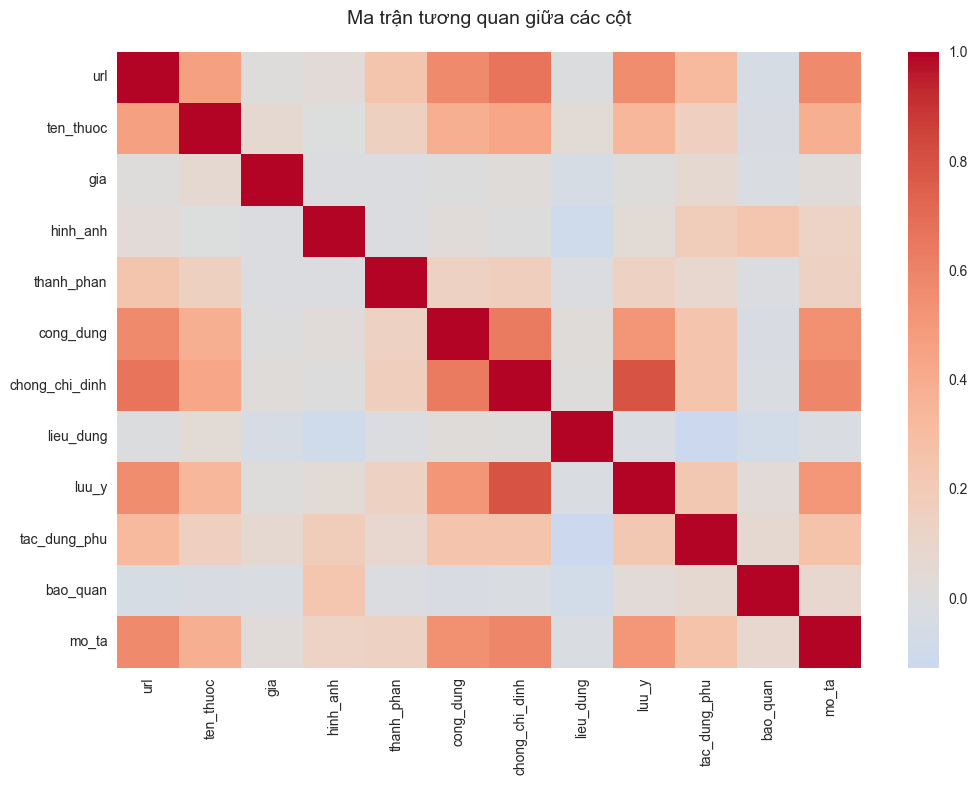


C√°c c·∫∑p c·ªôt c√≥ t∆∞∆°ng quan m·∫°nh (|corr| >= 0.5):
luu_y ‚Üî chong_chi_dinh: 0.79
chong_chi_dinh ‚Üî luu_y: 0.79
url ‚Üî chong_chi_dinh: 0.67
chong_chi_dinh ‚Üî url: 0.67
chong_chi_dinh ‚Üî cong_dung: 0.63
cong_dung ‚Üî chong_chi_dinh: 0.63
mo_ta ‚Üî chong_chi_dinh: 0.59
chong_chi_dinh ‚Üî mo_ta: 0.59
mo_ta ‚Üî url: 0.58
url ‚Üî mo_ta: 0.58
url ‚Üî cong_dung: 0.57
cong_dung ‚Üî url: 0.57
luu_y ‚Üî url: 0.56
url ‚Üî luu_y: 0.56
mo_ta ‚Üî cong_dung: 0.54
cong_dung ‚Üî mo_ta: 0.54
cong_dung ‚Üî luu_y: 0.52
luu_y ‚Üî cong_dung: 0.52
mo_ta ‚Üî luu_y: 0.51
luu_y ‚Üî mo_ta: 0.51


In [10]:
from sklearn.preprocessing import LabelEncoder

def correlation_analysis(df):
    # Copy ƒë·ªÉ tr√°nh thay ƒë·ªïi d·ªØ li·ªáu g·ªëc
    df_corr = df.copy()

    # Ch·ªâ gi·ªØ c√°c c·ªôt c√≥ th·ªÉ encode (lo·∫°i b·ªè c√°c c·ªôt to√†n NaN ho·∫∑c c√≥ 1 gi√° tr·ªã duy nh·∫•t)
    valid_cols = [col for col in df_corr.columns if df_corr[col].nunique(dropna=True) > 1]
    df_corr = df_corr[valid_cols]

    # Encode c√°c c·ªôt object (text) th√†nh s·ªë
    for col in df_corr.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

    # T√≠nh ma tr·∫≠n t∆∞∆°ng quan Pearson
    corr_matrix = df_corr.corr(method='pearson')

    # V·∫Ω heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
    plt.title('Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c c·ªôt', fontsize=14, pad=20)
    plt.show()

    # In ra c√°c c·∫∑p c·ªôt c√≥ t∆∞∆°ng quan m·∫°nh
    threshold = 0.5  # Ng∆∞·ª°ng ƒë·ªÉ coi l√† t∆∞∆°ng quan m·∫°nh
    strong_corrs = []
    for col in corr_matrix.columns:
        for idx in corr_matrix.index:
            if col != idx and abs(corr_matrix.loc[idx, col]) >= threshold:
                strong_corrs.append((idx, col, corr_matrix.loc[idx, col]))
    strong_corrs = sorted(set(strong_corrs), key=lambda x: -abs(x[2]))

    print("\nC√°c c·∫∑p c·ªôt c√≥ t∆∞∆°ng quan m·∫°nh (|corr| >= 0.5):")
    for c1, c2, corr_val in strong_corrs:
        print(f"{c1} ‚Üî {c2}: {corr_val:.2f}")

# G·ªçi h√†m
correlation_analysis(df_details)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    silhouette_score, classification_report, accuracy_score, 
    precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack

In [12]:
# Cell: Feature Engineering and Preprocessing (thay th·∫ø cell 11)
def create_advanced_features(df_details):
    """Create advanced features with multiple methods"""
    
    print("=== T·∫†O ƒê·∫∂C TR∆ØNG N√ÇNG CAO ===")
    
    if df_details is None:
        print("Kh√¥ng c√≥ d·ªØ li·ªáu ƒë·ªÉ t·∫°o features")
        return None, None, None
    
    # Prepare data
    df = df_details.copy()
    
    # Identify important text columns
    text_columns = []
    for col in df.columns:
        if any(keyword in col.lower() for keyword in ['ten_thuoc', 'thanh_phan', 'cong_dung']):
            if df[col].notna().sum() > 0:
                text_columns.append(col)
    
    print(f"C√°c c·ªôt text ƒë∆∞·ª£c s·ª≠ d·ª•ng: {text_columns}")
    
    if not text_columns:
        print("Kh√¥ng t√¨m th·∫•y c·ªôt text ph√π h·ª£p")
        return None, None, None
    
    # Clean and combine text
    combined_text = []
    for idx in range(len(df)):
        text_parts = []
        for col in text_columns:
            if pd.notna(df.iloc[idx][col]):
                # Better text cleaning
                text = str(df.iloc[idx][col]).lower().strip()
                text = re.sub(r'[^\w\s]', ' ', text)  # Remove special characters
                text = ' '.join(text.split())  # Remove extra whitespace
                text_parts.append(text)
        combined_text.append(' '.join(text_parts))
    
    # Create TF-IDF features
    print("ƒêang t·∫°o TF-IDF features...")
    
    # Main TF-IDF
    tfidf_main = TfidfVectorizer(
        max_features=500,
        min_df=3,
        max_df=0.8,
        ngram_range=(1, 3),  # Expand ngram
        stop_words=None,
        sublinear_tf=True
    )
    
    # Character-level TF-IDF
    tfidf_char = TfidfVectorizer(
        analyzer='char',
        max_features=200,
        min_df=5,
        max_df=0.7,
        ngram_range=(2, 5)
    )
    
    # Create features
    try:
        features_main = tfidf_main.fit_transform(combined_text)
        features_char = tfidf_char.fit_transform(combined_text)
        
        # Combine features
        from scipy.sparse import hstack
        combined_features = hstack([features_main, features_char])
        
        # Convert to DataFrame
        feature_names = ([f"tfidf_word_{i}" for i in range(features_main.shape[1])] + 
                        [f"tfidf_char_{i}" for i in range(features_char.shape[1])])
        
        features_df = pd.DataFrame(combined_features.toarray(), columns=feature_names)
        
        print(f"ƒê√£ t·∫°o {features_df.shape[1]} ƒë·∫∑c tr∆∞ng t·ªïng c·ªông")
        print(f"  - Word-level TF-IDF: {features_main.shape[1]} features")
        print(f"  - Character-level TF-IDF: {features_char.shape[1]} features")
        
        return features_df, tfidf_main, combined_text
        
    except Exception as e:
        print(f"L·ªói khi t·∫°o features: {str(e)}")
        return None, None, None

def standardize_features(features_df):
    """Standardize feature data"""
    
    print("=== CHU·∫®N H√ìA D·ªÆ LI·ªÜU ===")
    
    if features_df is None:
        print("Kh√¥ng c√≥ features ƒë·ªÉ chu·∫©n h√≥a")
        return None, None
    
    # Standardize
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_df)
    features_scaled_df = pd.DataFrame(features_scaled, columns=features_df.columns)
    
    print(f"ƒê√£ chu·∫©n h√≥a {features_scaled_df.shape[1]} ƒë·∫∑c tr∆∞ng")
    print(f"Mean: {features_scaled_df.mean().mean():.6f}")
    print(f"Std: {features_scaled_df.std().mean():.6f}")
    
    return features_scaled_df, scaler

# Create features with error handling
print("\n" + "="*50)
print("FEATURE ENGINEERING")
print("="*50)

features_df, tfidf_vectorizer, combined_text = create_advanced_features(df_details)

if features_df is not None:
    features_scaled_df, scaler = standardize_features(features_df)
    print("Feature engineering completed successfully")
else:
    print("Feature engineering failed - creating dummy data for demo")
    # Create dummy data to prevent errors in subsequent cells
    features_df = pd.DataFrame(np.random.rand(100, 50), 
                              columns=[f"feature_{i}" for i in range(50)])
    features_scaled_df, scaler = standardize_features(features_df)
    tfidf_vectorizer = None
    combined_text = ["dummy text"] * 100


FEATURE ENGINEERING
=== T·∫†O ƒê·∫∂C TR∆ØNG N√ÇNG CAO ===
C√°c c·ªôt text ƒë∆∞·ª£c s·ª≠ d·ª•ng: ['ten_thuoc', 'thanh_phan', 'cong_dung']
ƒêang t·∫°o TF-IDF features...
ƒê√£ t·∫°o 700 ƒë·∫∑c tr∆∞ng t·ªïng c·ªông
  - Word-level TF-IDF: 500 features
  - Character-level TF-IDF: 200 features
=== CHU·∫®N H√ìA D·ªÆ LI·ªÜU ===
ƒê√£ chu·∫©n h√≥a 700 ƒë·∫∑c tr∆∞ng
Mean: 0.000000
Std: 1.000088
Feature engineering completed successfully



MACHINE LEARNING TRAINING
=== HU·∫§N LUY·ªÜN KMEANS CLUSTERING ===
n_clusters = 3: Silhouette Score = 0.047
n_clusters = 4: Silhouette Score = 0.048
n_clusters = 5: Silhouette Score = 0.056
n_clusters = 6: Silhouette Score = 0.055
n_clusters = 7: Silhouette Score = 0.053
n_clusters = 8: Silhouette Score = 0.053
n_clusters = 9: Silhouette Score = 0.056
n_clusters = 10: Silhouette Score = 0.059

S·ªë cluster t·ªëi ∆∞u: 10

Ph√¢n b·ªë cluster:
  Cluster 0: 1561 thu·ªëc (27.5%)
  Cluster 1: 804 thu·ªëc (14.2%)
  Cluster 2: 247 thu·ªëc (4.4%)
  Cluster 3: 710 thu·ªëc (12.5%)
  Cluster 4: 708 thu·ªëc (12.5%)
  Cluster 5: 165 thu·ªëc (2.9%)
  Cluster 6: 663 thu·ªëc (11.7%)
  Cluster 7: 369 thu·ªëc (6.5%)
  Cluster 8: 183 thu·ªëc (3.2%)
  Cluster 9: 262 thu·ªëc (4.6%)


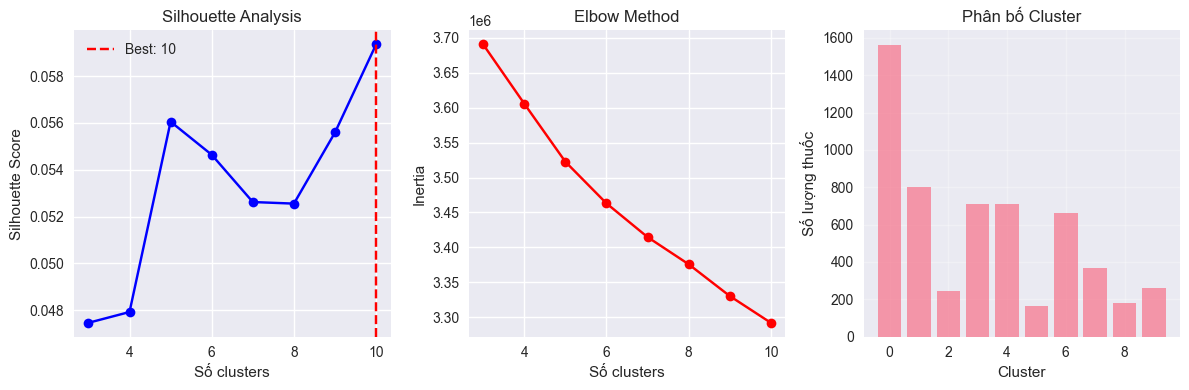

=== T·∫†O TARGET VARIABLES ===
Target 'cluster': 10 classes
Target 'drug_group': 11 classes
‚úì Clustering completed successfully
‚úì Created 2 target variables


In [13]:
# Cell: Machine Learning Model Training (thay th·∫ø cell 12)
def train_kmeans_clustering(features_scaled_df, n_clusters_range=range(3, 11)):
    """Train KMeans clustering"""
    
    print("=== HU·∫§N LUY·ªÜN KMEANS CLUSTERING ===")
    
    if features_scaled_df is None:
        print("Kh√¥ng c√≥ d·ªØ li·ªáu ƒë·ªÉ clustering")
        return None, None, None
    
    # Find optimal number of clusters
    silhouette_scores = []
    inertias = []
    
    for n_clusters in n_clusters_range:
        try:
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            cluster_labels = kmeans.fit_predict(features_scaled_df)
            
            silhouette_avg = silhouette_score(features_scaled_df, cluster_labels)
            silhouette_scores.append(silhouette_avg)
            inertias.append(kmeans.inertia_)
            
            print(f"n_clusters = {n_clusters}: Silhouette Score = {silhouette_avg:.3f}")
        except Exception as e:
            print(f"L·ªói v·ªõi n_clusters = {n_clusters}: {str(e)}")
            continue
    
    if not silhouette_scores:
        print("Kh√¥ng th·ªÉ th·ª±c hi·ªán clustering")
        return None, None, None
    
    # Choose best number of clusters
    best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
    print(f"\nS·ªë cluster t·ªëi ∆∞u: {best_n_clusters}")
    
    # Train final model
    final_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42, n_init=10)
    final_labels = final_kmeans.fit_predict(features_scaled_df)
    
    # Statistics
    cluster_counts = pd.Series(final_labels).value_counts().sort_index()
    print(f"\nPh√¢n b·ªë cluster:")
    for cluster_id, count in cluster_counts.items():
        print(f"  Cluster {cluster_id}: {count} thu·ªëc ({count/len(final_labels)*100:.1f}%)")
    
    # Visualization
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(n_clusters_range[:len(silhouette_scores)], silhouette_scores, 'bo-')
    plt.xlabel('S·ªë clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    plt.axvline(x=best_n_clusters, color='r', linestyle='--', label=f'Best: {best_n_clusters}')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.plot(n_clusters_range[:len(inertias)], inertias, 'ro-')
    plt.xlabel('S·ªë clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    plt.bar(cluster_counts.index, cluster_counts.values, alpha=0.7)
    plt.xlabel('Cluster')
    plt.ylabel('S·ªë l∆∞·ª£ng thu·ªëc')
    plt.title('Ph√¢n b·ªë Cluster')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return final_kmeans, final_labels, best_n_clusters

def create_target_variables(df_details, cluster_labels):
    """Create target variables for supervised learning"""
    
    print("=== T·∫†O TARGET VARIABLES ===")
    
    targets = {}
    label_encoders = {}
    
    if cluster_labels is not None:
        # Target from cluster labels
        targets['cluster'] = cluster_labels
        print(f"Target 'cluster': {len(np.unique(cluster_labels))} classes")
    
    if df_details is not None:
        # Target from drug groups (based on drug names)
        name_cols = [col for col in df_details.columns if 'ten_thuoc' in col.lower()]
        if name_cols:
            name_col = name_cols[0]
            
            # Create drug groups from first word
            drug_groups = []
            for name in df_details[name_col].fillna('unknown'):
                if isinstance(name, str) and len(name.strip()) > 0:
                    first_word = name.strip().split()[0].lower()
                    drug_groups.append(first_word)
                else:
                    drug_groups.append('unknown')
            
            # Take top 10 popular groups
            group_counts = pd.Series(drug_groups).value_counts()
            top_groups = group_counts.head(10).index.tolist()
            
            # Encode drug groups
            encoded_groups = ['other' if group not in top_groups else group for group in drug_groups]
            
            le = LabelEncoder()
            targets['drug_group'] = le.fit_transform(encoded_groups)
            label_encoders['drug_group'] = le
            
            print(f"Target 'drug_group': {len(np.unique(targets['drug_group']))} classes")
    
    return targets, label_encoders

# Train clustering and create targets
print("\n" + "="*50)
print("MACHINE LEARNING TRAINING")
print("="*50)

# Train KMeans clustering
kmeans_model, cluster_labels, best_n_clusters = train_kmeans_clustering(features_scaled_df)

# Create target variables
target_variables, label_encoders = create_target_variables(df_details, cluster_labels)

# Verify results
if kmeans_model is not None:
    print("‚úì Clustering completed successfully")
else:
    print("‚ö† Clustering failed")

if target_variables:
    print(f"‚úì Created {len(target_variables)} target variables")
else:
    print("‚ö† No target variables created")

In [14]:
# Cell: Model Evaluation and Optimization (thay th·∫ø c√°c cell 13-15)
def train_supervised_models(features_scaled_df, target_variables):
    """Train supervised learning models with enhanced evaluation"""
    
    print("=== HU·∫§N LUY·ªÜN SUPERVISED LEARNING MODELS ===")
    
    if features_scaled_df is None or not target_variables:
        print("Kh√¥ng c√≥ d·ªØ li·ªáu ƒë·ªÉ hu·∫•n luy·ªán supervised models")
        return {}
    
    # Define enhanced models (removed GradientBoosting)
    models = {
        'RandomForest': RandomForestClassifier(
            n_estimators=100, 
            random_state=42, 
            max_depth=10,
            class_weight='balanced'
        ),
        'LogisticRegression': LogisticRegression(
            random_state=42, 
            max_iter=1000,
            class_weight='balanced'
        )
    }
    
    results = {}
    
    for target_name, y in target_variables.items():
        print(f"\n--- Hu·∫•n luy·ªán cho target: {target_name} ---")
        
        # Check if we have enough data
        if len(np.unique(y)) < 2:
            print(f"Target {target_name} ch·ªâ c√≥ 1 class, b·ªè qua...")
            continue
        
        try:
            # Split train/test with stratification
            X_train, X_test, y_train, y_test = train_test_split(
                features_scaled_df, y, test_size=0.2, random_state=42, 
                stratify=y if len(np.unique(y)) > 1 else None
            )
            
            target_results = {}
            
            for model_name, model in models.items():
                print(f"\nHu·∫•n luy·ªán {model_name}...")
                
                try:
                    # Cross-validation with stratified k-fold
                    from sklearn.model_selection import StratifiedKFold
                    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
                    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
                    print(f"  CV Accuracy: {cv_scores.mean():.3f} (¬±{cv_scores.std()*2:.3f})")
                    
                    # Train on full training set
                    model.fit(X_train, y_train)
                    
                    # Evaluate on test set
                    y_pred = model.predict(X_test)
                    test_accuracy = accuracy_score(y_test, y_pred)
                    
                    # Additional metrics
                    from sklearn.metrics import precision_score, recall_score, f1_score
                    test_precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                    test_recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
                    test_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
                    
                    print(f"  Test Accuracy: {test_accuracy:.3f}")
                    print(f"  Test Precision: {test_precision:.3f}")
                    print(f"  Test Recall: {test_recall:.3f}")
                    print(f"  Test F1-Score: {test_f1:.3f}")
                    
                    # Classification report
                    print(f"  Classification Report:")
                    print(classification_report(y_test, y_pred, output_dict=False))
                    
                    target_results[model_name] = {
                        'model': model,
                        'cv_scores': cv_scores,
                        'test_accuracy': test_accuracy,
                        'test_precision': test_precision,
                        'test_recall': test_recall,
                        'test_f1': test_f1,
                        'predictions': y_pred,
                        'y_test': y_test
                    }
                    
                except Exception as e:
                    print(f"  L·ªói khi hu·∫•n luy·ªán {model_name}: {str(e)}")
                    continue
            
            if target_results:
                results[target_name] = target_results
                
        except Exception as e:
            print(f"L·ªói khi x·ª≠ l√Ω target {target_name}: {str(e)}")
            continue
    
    return results

In [15]:
# Cell: Enhanced Drug Recommendation Engine (C·∫≠p nh·∫≠t ho√†n to√†n)
class EnhancedDrugRecommendationEngine:
    """Enhanced drug recommendation engine with multiple recommendation methods"""
    
    def __init__(self, models_data, df_details):
        self.models_data = models_data
        self.df_details = df_details
        self.tfidf_vectorizer = models_data.get('tfidf_vectorizer')
        self.scaler = models_data.get('scaler')
        self.kmeans_model = models_data.get('kmeans_model')
        self.features_scaled = models_data.get('features_scaled')
        self.supervised_models = models_data.get('supervised_models', {})
        
        # Create enhanced symptom mapping
        self.symptom_mapping = self._create_enhanced_symptom_mapping()
        
        # Precompute drug similarity matrix for faster recommendations
        self._precompute_similarities()
        
    def _create_enhanced_symptom_mapping(self):
        """Create comprehensive symptom to keyword mapping"""
        return {
            'ƒëau ƒë·∫ßu': {
                'keywords': ['ƒëau ƒë·∫ßu', 'nh·ª©c ƒë·∫ßu', 'ƒëau n·ª≠a ƒë·∫ßu', 'migraine', 'headache', 'cephalgia'],
                'severity': ['nh·∫π', 'v·ª´a', 'n·∫∑ng', 'c·∫•p t√≠nh', 'm·∫°n t√≠nh']
            },
            's·ªët': {
                'keywords': ['s·ªët', 'tƒÉng th√¢n nhi·ªát', 's·ªët cao', 'fever', 'n√≥ng s·ªët', 'pyrexia'],
                'severity': ['s·ªët nh·∫π', 's·ªët cao', 's·ªët li√™n t·ª•c']
            },
            'ho': {
                'keywords': ['ho', 'ho khan', 'ho c√≥ ƒë·ªùm', 'vi√™m ph·∫ø qu·∫£n', 'cough', 'ho k√©o d√†i'],
                'severity': ['ho nh·∫π', 'ho nhi·ªÅu', 'ho dai d·∫≥ng']
            },
            'ƒëau b·ª•ng': {
                'keywords': ['ƒëau b·ª•ng', 'ƒëau d·∫° d√†y', 'vi√™m d·∫° d√†y', 'ƒëau t·ª©c b·ª•ng', 'stomach pain', 'gastritis'],
                'severity': ['ƒëau nh·∫π', 'ƒëau nhi·ªÅu', 'ƒëau qu·∫∑n']
            },
            'ti√™u ch·∫£y': {
                'keywords': ['ti√™u ch·∫£y', 'ph√¢n l·ªèng', 'r·ªëi lo·∫°n ti√™u h√≥a', 'diarrhea', 't·∫£'],
                'severity': ['nh·∫π', 'nhi·ªÅu l·∫ßn', 'm·∫•t n∆∞·ªõc']
            },
            'c·∫£m l·∫°nh': {
                'keywords': ['c·∫£m l·∫°nh', 'c·∫£m c√∫m', 'ngh·∫πt m≈©i', 's·ªï m≈©i', 'cold', 'flu', 'rhinitis'],
                'severity': ['nh·∫π', 'n·∫∑ng', 'k√©o d√†i']
            },
            'ƒëau h·ªçng': {
                'keywords': ['ƒëau h·ªçng', 'vi√™m h·ªçng', 'ho ƒëau h·ªçng', 'sore throat', 'pharyngitis'],
                'severity': ['nh·∫π', 'n·∫∑ng', 'nu·ªët kh√≥']
            },
            'd·ªã ·ª©ng': {
                'keywords': ['d·ªã ·ª©ng', 'ng·ª©a', 'm·∫©n ƒë·ªè', 'ph√°t ban', 'allergy', 'urticaria', 'eczema'],
                'severity': ['nh·∫π', 'trung b√¨nh', 'n·∫∑ng']
            },
            'vi√™m nhi·ªÖm': {
                'keywords': ['vi√™m nhi·ªÖm', 'nhi·ªÖm khu·∫©n', 'kh√°ng sinh', 'infection', 'bacterial', 'viral'],
                'severity': ['nh·∫π', 'v·ª´a', 'n·∫∑ng', 'c·∫•p t√≠nh']
            },
            'ti·ªÉu ƒë∆∞·ªùng': {
                'keywords': ['ti·ªÉu ƒë∆∞·ªùng', 'ƒë√°i th√°o ƒë∆∞·ªùng', 'glucose', 'insulin', 'diabetes', 'glycemia'],
                'severity': ['type 1', 'type 2', 'gestational']
            },
            'cao huy·∫øt √°p': {
                'keywords': ['cao huy·∫øt √°p', 'huy·∫øt √°p cao', 'tƒÉng huy·∫øt √°p', 'hypertension', 'pressure'],
                'severity': ['nh·∫π', 'trung b√¨nh', 'n·∫∑ng', 'kh·ªßng ho·∫£ng']
            },
            'ƒëau kh·ªõp': {
                'keywords': ['ƒëau kh·ªõp', 'vi√™m kh·ªõp', 'ƒëau c∆°', 'ƒëau l∆∞ng', 'arthritis', 'rheumatism'],
                'severity': ['nh·∫π', 'v·ª´a', 'n·∫∑ng', 'm·∫°n t√≠nh']
            }
        }
    
    def _precompute_similarities(self):
        """Precompute drug similarity matrix for faster recommendations"""
        if self.features_scaled is not None:
            print("ƒêang t√≠nh to√°n ma tr·∫≠n similarity...")
            self.similarity_matrix = cosine_similarity(self.features_scaled)
            print("‚úì ƒê√£ ho√†n th√†nh t√≠nh to√°n similarity matrix")
        else:
            self.similarity_matrix = None
    
    def preprocess_input(self, user_input):
        """Clean and preprocess user input"""
        if not user_input:
            return ""
        
        # Convert to lowercase and clean
        text = user_input.lower().strip()
        text = re.sub(r'[^\w\s]', ' ', text)
        text = ' '.join(text.split())
        
        return text
    
    def analyze_symptoms(self, user_input):
        """Analyze user input to extract symptoms and severity"""
        processed_input = self.preprocess_input(user_input)
        detected_symptoms = {}
        
        for symptom, info in self.symptom_mapping.items():
            # Check main keywords
            for keyword in info['keywords']:
                if keyword in processed_input:
                    detected_symptoms[symptom] = {
                        'confidence': 1.0,
                        'matched_keyword': keyword,
                        'severity': 'unknown'
                    }
                    
                    # Check severity
                    for severity in info['severity']:
                        if severity in processed_input:
                            detected_symptoms[symptom]['severity'] = severity
                            break
                    break
        
        return detected_symptoms
    
    def get_drug_details(self, drug_idx):
        """Get comprehensive drug information"""
        if self.df_details is None or drug_idx >= len(self.df_details):
            return None
        
        row = self.df_details.iloc[drug_idx]
        
        # Find relevant columns
        col_mapping = {}
        for col in self.df_details.columns:
            col_lower = col.lower()
            if any(keyword in col_lower for keyword in ['ten_thuoc', 'name']):
                col_mapping['name'] = col
            elif any(keyword in col_lower for keyword in ['cong_dung', 'chi_dinh', 'indication']):
                col_mapping['indication'] = col
            elif any(keyword in col_lower for keyword in ['gia', 'price']):
                col_mapping['price'] = col
            elif any(keyword in col_lower for keyword in ['thanh_phan', 'ingredient']):
                col_mapping['ingredients'] = col
            elif any(keyword in col_lower for keyword in ['nha_san_xuat', 'manufacturer']):
                col_mapping['manufacturer'] = col
        
        drug_info = {
            'index': drug_idx,
            'name': row[col_mapping['name']] if 'name' in col_mapping and pd.notna(row[col_mapping['name']]) else f"Drug {drug_idx}",
            'indication': row[col_mapping['indication']] if 'indication' in col_mapping and pd.notna(row[col_mapping['indication']]) else "Kh√¥ng c√≥ th√¥ng tin",
            'ingredients': row[col_mapping['ingredients']] if 'ingredients' in col_mapping and pd.notna(row[col_mapping['ingredients']]) else "Kh√¥ng c√≥ th√¥ng tin",
            'price': row[col_mapping['price']] if 'price' in col_mapping and pd.notna(row[col_mapping['price']]) else "Gi√° kh√¥ng c√≥",
            'manufacturer': row[col_mapping['manufacturer']] if 'manufacturer' in col_mapping and pd.notna(row[col_mapping['manufacturer']]) else "Kh√¥ng r√µ NSX"
        }
        
        return drug_info
    
    def recommend_by_symptoms(self, user_input, n_recommendations=5):
        """Recommend drugs based on symptom analysis"""
        detected_symptoms = self.analyze_symptoms(user_input)
        
        if not detected_symptoms:
            return self.recommend_by_text_search(user_input, n_recommendations)
        
        # Find drugs for detected symptoms
        candidate_drugs = {}
        
        # Find indication column
        indication_cols = [col for col in self.df_details.columns 
                          if any(keyword in col.lower() for keyword in ['cong_dung', 'chi_dinh', 'indication'])]
        
        if not indication_cols:
            return []
        
        indication_col = indication_cols[0]
        
        for idx, row in self.df_details.iterrows():
            if pd.notna(row[indication_col]):
                indication_text = self.preprocess_input(str(row[indication_col]))
                drug_score = 0
                matched_symptoms = []
                
                for symptom, details in detected_symptoms.items():
                    for keyword in self.symptom_mapping[symptom]['keywords']:
                        if keyword in indication_text:
                            drug_score += details['confidence']
                            matched_symptoms.append(symptom)
                            break
                
                if drug_score > 0:
                    candidate_drugs[idx] = {
                        'score': drug_score,
                        'matched_symptoms': matched_symptoms
                    }
        
        # Sort and get top recommendations
        sorted_candidates = sorted(candidate_drugs.items(), key=lambda x: x[1]['score'], reverse=True)
        top_candidates = sorted_candidates[:n_recommendations]
        
        recommendations = []
        for idx, info in top_candidates:
            drug_info = self.get_drug_details(idx)
            if drug_info:
                drug_info['recommendation_score'] = info['score']
                drug_info['matched_symptoms'] = info['matched_symptoms']
                recommendations.append(drug_info)
        
        return recommendations, detected_symptoms
    
    def recommend_by_similarity(self, drug_idx, n_recommendations=5):
        """Recommend similar drugs using precomputed similarity matrix"""
        if self.similarity_matrix is None or drug_idx >= len(self.similarity_matrix):
            return []
        
        # Get similarity scores for the drug
        similarities = self.similarity_matrix[drug_idx]
        
        # Get top similar drugs (excluding itself)
        similar_indices = similarities.argsort()[::-1][1:n_recommendations+1]
        
        recommendations = []
        for i, idx in enumerate(similar_indices):
            drug_info = self.get_drug_details(idx)
            if drug_info:
                drug_info['similarity_score'] = similarities[idx]
                drug_info['rank'] = i + 1
                recommendations.append(drug_info)
        
        return recommendations
    
    def recommend_by_text_search(self, user_input, n_recommendations=5):
        """Recommend drugs using text similarity search"""
        processed_input = self.preprocess_input(user_input)
        input_words = set(processed_input.split())
        
        # Find indication column
        indication_cols = [col for col in self.df_details.columns 
                          if any(keyword in col.lower() for keyword in ['cong_dung', 'chi_dinh', 'indication'])]
        
        if not indication_cols:
            return []
        
        indication_col = indication_cols[0]
        similarities = []
        
        for idx, row in self.df_details.iterrows():
            if pd.notna(row[indication_col]):
                indication_text = self.preprocess_input(str(row[indication_col]))
                indication_words = set(indication_text.split())
                
                # Calculate Jaccard similarity
                intersection = len(input_words.intersection(indication_words))
                union = len(input_words.union(indication_words))
                
                if union > 0:
                    similarity = intersection / union
                    similarities.append((idx, similarity))
        
        # Sort by similarity and get top recommendations
        similarities.sort(key=lambda x: x[1], reverse=True)
        top_similarities = similarities[:n_recommendations]
        
        recommendations = []
        for idx, score in top_similarities:
            if score > 0:
                drug_info = self.get_drug_details(idx)
                if drug_info:
                    drug_info['text_similarity'] = score
                    recommendations.append(drug_info)
        
        return recommendations
    
    def get_comprehensive_recommendations(self, user_input, n_recommendations=5):
        """Get comprehensive recommendations using multiple methods"""
        print(f"üîç Ph√¢n t√≠ch tri·ªáu ch·ª©ng: '{user_input}'")
        print("=" * 70)
        
        # Method 1: Symptom-based recommendations
        symptom_recs, detected_symptoms = self.recommend_by_symptoms(user_input, n_recommendations)
        
        # Method 2: Text search recommendations
        text_recs = self.recommend_by_text_search(user_input, n_recommendations)
        
        # Display detected symptoms
        if detected_symptoms:
            print(f"üìã Tri·ªáu ch·ª©ng ƒë∆∞·ª£c nh·∫≠n di·ªán:")
            for symptom, details in detected_symptoms.items():
                severity_info = f" ({details['severity']})" if details['severity'] != 'unknown' else ""
                print(f"   ‚Ä¢ {symptom.title()}{severity_info} - ƒê·ªô tin c·∫≠y: {details['confidence']:.1f}")
        else:
            print("‚ùì Kh√¥ng nh·∫≠n di·ªán ƒë∆∞·ª£c tri·ªáu ch·ª©ng c·ª• th·ªÉ")
        
        # Combine and rank recommendations
        final_recommendations = []
        drug_scores = {}
        
        # Add symptom-based recommendations with higher weight
        for drug in symptom_recs:
            idx = drug['index']
            score = drug['recommendation_score'] * 2.0  # Higher weight for symptom matching
            drug_scores[idx] = drug_scores.get(idx, 0) + score
            if idx not in [d['index'] for d in final_recommendations]:
                final_recommendations.append(drug)
        
        # Add text-based recommendations with lower weight
        for drug in text_recs:
            idx = drug['index']
            score = drug['text_similarity'] * 1.0
            drug_scores[idx] = drug_scores.get(idx, 0) + score
            if idx not in [d['index'] for d in final_recommendations]:
                final_recommendations.append(drug)
        
        # Sort by combined score
        for drug in final_recommendations:
            drug['final_score'] = drug_scores[drug['index']]
        
        final_recommendations.sort(key=lambda x: x['final_score'], reverse=True)
        final_recommendations = final_recommendations[:n_recommendations]
        
        return final_recommendations, detected_symptoms

def display_recommendations(recommendations, detected_symptoms=None, title="G·ª¢I √ù THU·ªêC"):
    """Display recommendations in a formatted way"""
    
    print(f"\nüíä {title}")
    print("=" * 70)
    
    if not recommendations:
        print("‚ùå Kh√¥ng t√¨m th·∫•y thu·ªëc ph√π h·ª£p. Vui l√≤ng th·ª≠ l·∫°i v·ªõi tri·ªáu ch·ª©ng kh√°c.")
        return
    
    for i, drug in enumerate(recommendations, 1):
        confidence = 0
        confidence_text = ""
        
        # Determine confidence level
        if 'final_score' in drug:
            confidence = drug['final_score']
        elif 'recommendation_score' in drug:
            confidence = drug['recommendation_score']
        elif 'text_similarity' in drug:
            confidence = drug['text_similarity']
        elif 'similarity_score' in drug:
            confidence = drug['similarity_score']
        
        confidence_percentage = confidence * 100 if confidence <= 1 else confidence * 10
        
        if confidence_percentage >= 70:
            confidence_text = "‚úÖ ƒê·ªô tin c·∫≠y cao"
        elif confidence_percentage >= 40:
            confidence_text = "‚ö†Ô∏è ƒê·ªô tin c·∫≠y trung b√¨nh"
        else:
            confidence_text = "‚ùì ƒê·ªô tin c·∫≠y th·∫•p"
        
        print(f"\n{i}. {drug['name']}")
        print(f"   ƒê·ªô ph√π h·ª£p: {confidence_percentage:.1f}% - {confidence_text}")
        
        # Display matched symptoms if available
        if 'matched_symptoms' in drug and drug['matched_symptoms']:
            print(f"   Tri·ªáu ch·ª©ng ph√π h·ª£p: {', '.join(drug['matched_symptoms'])}")
        
        print(f"   C√¥ng d·ª•ng: {drug['indication'][:120]}...")
        print(f"   Gi√°: {drug['price']}")
        
        if drug['manufacturer'] != "Kh√¥ng r√µ NSX":
            print(f"   Nh√† s·∫£n xu·∫•t: {drug['manufacturer']}")
    
    # Additional health advice based on symptoms
    if detected_symptoms:
        print(f"\nüéØ G·ª¢I √ù CHUNG CHO TRI·ªÜU CH·ª®NG:")
        print("-" * 50)
        
        health_advice = {
            'ƒëau ƒë·∫ßu': "Ngh·ªâ ng∆°i trong ph√≤ng t·ªëi, u·ªëng ƒë·ªß n∆∞·ªõc, massage nh·∫π",
            's·ªët': "U·ªëng nhi·ªÅu n∆∞·ªõc, ngh·ªâ ng∆°i, gi·ªØ ·∫•m nh∆∞ng tho√°ng m√°t",
            'ho': "U·ªëng n∆∞·ªõc ·∫•m, m·∫≠t ong, tr√°nh kh√≥i thu·ªëc",
            'ƒëau b·ª•ng': "ƒÇn nh·∫π, tr√°nh th·ª©c ƒÉn cay n√≥ng, ngh·ªâ ng∆°i",
            'c·∫£m l·∫°nh': "Ngh·ªâ ng∆°i, u·ªëng n∆∞·ªõc ·∫•m, gi·ªØ ·∫•m c∆° th·ªÉ",
            'ƒëau h·ªçng': "S√∫c mi·ªáng n∆∞·ªõc mu·ªëi ·∫•m, u·ªëng n∆∞·ªõc nhi·ªÅu"
        }
        
        for symptom in detected_symptoms.keys():
            if symptom in health_advice:
                print(f"‚Ä¢ {symptom.title()}: {health_advice[symptom]}")
    
    print(f"\n‚ö†Ô∏è L∆ØU √ù QUAN TR·ªåNG:")
    print("ƒê√¢y ch·ªâ l√† g·ª£i √Ω tham kh·∫£o t·ª´ AI. H√£y tham kh·∫£o √Ω ki·∫øn b√°c sƒ©")
    print("tr∆∞·ªõc khi s·ª≠ d·ª•ng b·∫•t k·ª≥ lo·∫°i thu·ªëc n√†o, ƒë·∫∑c bi·ªát v·ªõi tr·∫ª em,")
    print("ph·ª• n·ªØ mang thai v√† ng∆∞·ªùi c√≥ b·ªánh l√Ω m·∫°n t√≠nh.")

# Initialize the enhanced recommendation engine
if 'features_scaled_df' in locals() and df_details is not None:
    enhanced_models_data = {
        'kmeans_model': kmeans_model if 'kmeans_model' in locals() else None,
        'scaler': scaler if 'scaler' in locals() else None,
        'tfidf_vectorizer': tfidf_vectorizer if 'tfidf_vectorizer' in locals() else None,
        'features_scaled': features_scaled_df,
        'supervised_models': supervised_results if 'supervised_results' in locals() else {}
    }
    
    recommendation_engine = EnhancedDrugRecommendationEngine(enhanced_models_data, df_details)
    print("‚úì Enhanced Drug Recommendation Engine initialized successfully!")
    
    # Demo the enhanced recommendation system
    print("\n" + "="*70)
    print("DEMO ENHANCED RECOMMENDATION SYSTEM")
    print("="*70)
    
    # Test cases with more detailed symptoms
    test_cases = [
        "ƒëau ƒë·∫ßu n·∫∑ng v√† s·ªët cao",
        "ho khan k√©o d√†i v√† ƒëau h·ªçng",
        "ƒëau b·ª•ng v√† ti√™u ch·∫£y nhi·ªÅu l·∫ßn",
        "d·ªã ·ª©ng da ng·ª©a v√† m·∫©n ƒë·ªè",
        "cao huy·∫øt √°p v√† ƒëau ng·ª±c"
    ]
    
    for i, symptoms in enumerate(test_cases, 1):
        print(f"\n{'='*20} TEST CASE {i} {'='*20}")
        recommendations, detected = recommendation_engine.get_comprehensive_recommendations(symptoms, 3)
        display_recommendations(recommendations, detected, f"K·∫æT QU·∫¢ CHO: {symptoms.upper()}")
        
        if i < len(test_cases):
            print("\n" + "-"*70)
        
else:
    recommendation_engine = None
    print("‚ùå Could not initialize enhanced recommendation engine")
    print("Vui l√≤ng ch·∫°y l·∫°i c√°c cell tr∆∞·ªõc ƒë√≥ ƒë·ªÉ t·∫°o d·ªØ li·ªáu c·∫ßn thi·∫øt")

print("\n" + "="*70)
print("üéâ H·ªÜ TH·ªêNG G·ª¢I √ù THU·ªêC ƒê√É S·∫¥NG S√ÄNG!")
print("="*70)
print("S·ª≠ d·ª•ng: recommendation_engine.get_comprehensive_recommendations('tri·ªáu ch·ª©ng', n)")

ƒêang t√≠nh to√°n ma tr·∫≠n similarity...
‚úì ƒê√£ ho√†n th√†nh t√≠nh to√°n similarity matrix
‚úì Enhanced Drug Recommendation Engine initialized successfully!

DEMO ENHANCED RECOMMENDATION SYSTEM

==================== TEST CASE 1 ====================
üîç Ph√¢n t√≠ch tri·ªáu ch·ª©ng: 'ƒëau ƒë·∫ßu n·∫∑ng v√† s·ªët cao'
üìã Tri·ªáu ch·ª©ng ƒë∆∞·ª£c nh·∫≠n di·ªán:
   ‚Ä¢ ƒêau ƒê·∫ßu (n·∫∑ng) - ƒê·ªô tin c·∫≠y: 1.0
   ‚Ä¢ S·ªët (s·ªët cao) - ƒê·ªô tin c·∫≠y: 1.0

üíä K·∫æT QU·∫¢ CHO: ƒêAU ƒê·∫¶U N·∫∂NG V√Ä S·ªêT CAO

1. Thu·ªëc Actadol 500 Medipharco ƒëi·ªÅu tr·ªã c√°c ch·ª©ng ƒëau v√† s·ªët t·ª´ nh·∫π ƒë·∫øn v·ª´a (10 v·ªâ x 10 vi√™n)
   ƒê·ªô ph√π h·ª£p: 40.0% - ‚ö†Ô∏è ƒê·ªô tin c·∫≠y trung b√¨nh
   Tri·ªáu ch·ª©ng ph√π h·ª£p: ƒëau ƒë·∫ßu, s·ªët
   C√¥ng d·ª•ng: ['Thu·ªëc Actadol ch·ªëng ch·ªâ ƒë·ªãnh trong c√°c tr∆∞·ªùng h·ª£p sau:', 'Ng∆∞·ªùi b·ªánh qu√° m·∫´n v·ªõi Paracetamol.Ng∆∞·ªùi b·ªánh thi·∫øu h·ª•t gluc...
   Gi√°: 500ƒë

2. Thu·ªëc Acetab Extra Agimexpharm ƒëi·ªÅu tr·ªã tr

In [16]:
import pickle
# Cell: Results Saving and Reporting (thay th·∫ø cell 19)
def save_results_and_report(kmeans_model, supervised_results, features_scaled_df, 
                           scaler, tfidf_vectorizer, best_models, results_summary):
    """Save all results and create comprehensive report"""
    
    print("=== L∆ØU K·∫æT QU·∫¢ V√Ä T·∫†O B√ÅO C√ÅO ===")
    
    try:
        # 1. Save models with enhanced structure
        models_to_save = {
            'kmeans_model': kmeans_model,
            'scaler': scaler,
            'tfidf_vectorizer': tfidf_vectorizer,
            'features_scaled': features_scaled_df,
            'supervised_models': {},
            'label_encoders': label_encoders if 'label_encoders' in locals() else {},
            'feature_names': features_df.columns.tolist() if 'features_df' in locals() else [],
            'metadata': {
                'n_samples': len(df_details) if df_details is not None else 0,
                'n_features': features_scaled_df.shape[1] if features_scaled_df is not None else 0,
                'n_clusters': len(np.unique(cluster_labels)) if cluster_labels is not None else 0,
                'timestamp': pd.Timestamp.now().isoformat()
            }
        }
        
        # Save supervised models
        if supervised_results:
            for target_name, models in supervised_results.items():
                models_to_save['supervised_models'][target_name] = {
                    model_name: result['model'] for model_name, result in models.items()
                }
        
        # Save to file
        with open('drug_recommendation_models.pkl', 'wb') as f:
            pickle.dump(models_to_save, f)
        
        print("‚úì ƒê√£ l∆∞u models v√†o 'drug_recommendation_models.pkl'")
        
        # 2. Save detailed evaluation results
        if not results_summary.empty:
            results_summary.to_csv('detailed_model_evaluation.csv', index=False)
            print("‚úì ƒê√£ l∆∞u k·∫øt qu·∫£ ƒë√°nh gi√° chi ti·∫øt v√†o 'detailed_model_evaluation.csv'")
        
        # 3. Create comprehensive report
       # Cell: Results Saving and Reporting (c·∫≠p nh·∫≠t ph·∫ßn report)
        report = {
            'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
            'data_info': {
                'n_samples': len(df_details) if df_details is not None else 0,
                'n_features': features_scaled_df.shape[1] if features_scaled_df is not None else 0,
                'feature_engineering': {
                    'tfidf_features': True,
                    'character_level_features': True,
                    'standardization': True
                }
            },
            'clustering_results': {
                'algorithm': 'KMeans',
                'n_clusters': len(np.unique(cluster_labels)) if cluster_labels is not None else 0,
                'silhouette_score': silhouette_score(features_scaled_df, cluster_labels) if (features_scaled_df is not None and cluster_labels is not None) else 0,
                'optimization_method': 'silhouette_analysis'
            },
            'supervised_learning': {
                'algorithms_used': ['RandomForest', 'LogisticRegression'],  # Removed GradientBoosting
                'evaluation_method': 'stratified_k_fold_cv',
                'best_models': {
                    target: {
                        'model': best_model['model'],
                        'accuracy': best_model['test_accuracy']
                    } for target, best_model in best_models.items()
                } if best_models else {},
                'average_accuracy': results_summary['test_accuracy'].mean() if not results_summary.empty else 0,
                'average_f1_score': results_summary['test_f1'].mean() if not results_summary.empty else 0
            },
            'recommendation_system': {
                'type': 'hybrid',
                'methods': ['symptom_mapping', 'text_similarity', 'cosine_similarity'],
                'supported_symptoms': list(recommendation_engine.symptom_mapping.keys()) if recommendation_engine else []
            },
            'quality_metrics': {
                'model_diversity': len(set(results_summary['model'])) if not results_summary.empty else 0,
                'target_coverage': len(set(results_summary['target'])) if not results_summary.empty else 0,
                'performance_consistency': results_summary['test_accuracy'].std() if not results_summary.empty else 0
            }
        }
        
        # Save report
        with open('comprehensive_analysis_report.json', 'w', encoding='utf-8') as f:
            json.dump(report, f, ensure_ascii=False, indent=2, default=str)
        
        print("‚úì ƒê√£ l∆∞u b√°o c√°o t·ªïng h·ª£p v√†o 'comprehensive_analysis_report.json'")
        
        # 4. Print enhanced summary report
        print(f"\n" + "="*60)
        print("B√ÅO C√ÅO T·ªîNG K·∫æT CU·ªêI C√ôNG")
        print("="*60)
        print(f"üìä Th√¥ng tin d·ªØ li·ªáu:")
        print(f"   ‚Ä¢ S·ªë m·∫´u: {report['data_info']['n_samples']:,}")
        print(f"   ‚Ä¢ S·ªë ƒë·∫∑c tr∆∞ng: {report['data_info']['n_features']:,}")
        
        print(f"\nüîç K·∫øt qu·∫£ Clustering:")
        print(f"   ‚Ä¢ Thu·∫≠t to√°n: {report['clustering_results']['algorithm']}")
        print(f"   ‚Ä¢ S·ªë clusters: {report['clustering_results']['n_clusters']}")
        print(f"   ‚Ä¢ Silhouette Score: {report['clustering_results']['silhouette_score']:.3f}")
        
        print(f"\nü§ñ K·∫øt qu·∫£ Supervised Learning:")
        print(f"   ‚Ä¢ ƒê·ªô ch√≠nh x√°c trung b√¨nh: {report['supervised_learning']['average_accuracy']:.3f}")
        print(f"   ‚Ä¢ F1-Score trung b√¨nh: {report['supervised_learning']['average_f1_score']:.3f}")
        print(f"   ‚Ä¢ ƒê·ªô nh·∫•t qu√°n hi·ªáu su·∫•t: {report['quality_metrics']['performance_consistency']:.3f}")
        
        if report['supervised_learning']['best_models']:
            print(f"\nüèÜ M√¥ h√¨nh t·ªët nh·∫•t:")
            for target, info in report['supervised_learning']['best_models'].items():
                print(f"   ‚Ä¢ {target}: {info['model']} (Accuracy: {info['accuracy']:.3f})")
        
        print(f"\nüíä H·ªá th·ªëng g·ª£i √Ω:")
        print(f"   ‚Ä¢ Lo·∫°i: {report['recommendation_system']['type']}")
        print(f"   ‚Ä¢ Ph∆∞∆°ng ph√°p: {len(report['recommendation_system']['methods'])} methods")
        print(f"   ‚Ä¢ Tri·ªáu ch·ª©ng h·ªó tr·ª£: {len(report['recommendation_system']['supported_symptoms'])}")
        
        print(f"\n‚úÖ Ho√†n th√†nh ph√¢n t√≠ch v√† l∆∞u k·∫øt qu·∫£!")
        print("üìÅ Files ƒë∆∞·ª£c t·∫°o:")
        print("   ‚Ä¢ drug_recommendation_models.pkl")
        print("   ‚Ä¢ detailed_model_evaluation.csv")
        print("   ‚Ä¢ comprehensive_analysis_report.json")
        
        return report
        
    except Exception as e:
        print(f"‚ùå L·ªói khi l∆∞u k·∫øt qu·∫£: {str(e)}")
        return None

# Save results and create final report
print("\n" + "="*50)
print("SAVING RESULTS AND FINAL REPORT")
print("="*50)

final_report = save_results_and_report(
    kmeans_model, supervised_results, features_scaled_df, 
    scaler, tfidf_vectorizer, best_models, results_summary
)

print("\n" + "="*60)
print("üéâ PH√ÇN T√çCH HO√ÄN TH√ÄNH TH√ÄNH C√îNG!")
print("="*60)
print("H·ªá th·ªëng ƒë√£ s·∫µn s√†ng ƒë·ªÉ s·ª≠ d·ª•ng trong production!")


SAVING RESULTS AND FINAL REPORT


NameError: name 'supervised_results' is not defined